In [34]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# histogram match
bad = sitk.ReadImage('datasets/train/all_image/patient45_LGE.nii.gz',sitk.sitkFloat32)
bad = sitk.GetArrayFromImage(bad)
test = []
for i in range(bad.shape[0]):
    test.append(bad[i])
image = sitk.ReadImage('datasets/train/fake_lge/patient10_C0_1.nii')
reference_ = sitk.GetArrayFromImage(image)[0]
filter = sitk.HistogramMatchingImageFilter()
filter.SetNumberOfHistogramLevels(1024)
filter.SetNumberOfMatchPoints(7)
filter.ThresholdAtMeanIntensityOn()
after = slice_histogram_match(source=test,reference=image,filter=filter)

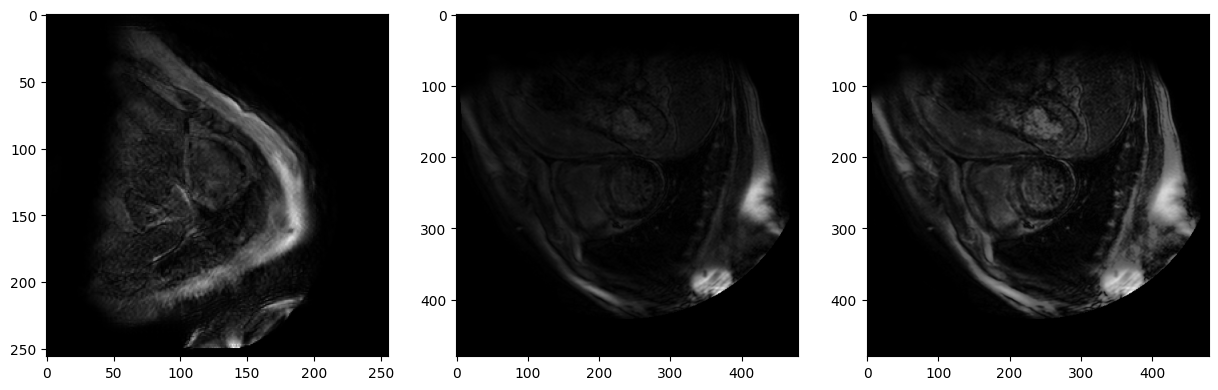

In [39]:
index = 10
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(reference_,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(test[index],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(after[index],cmap='gray')

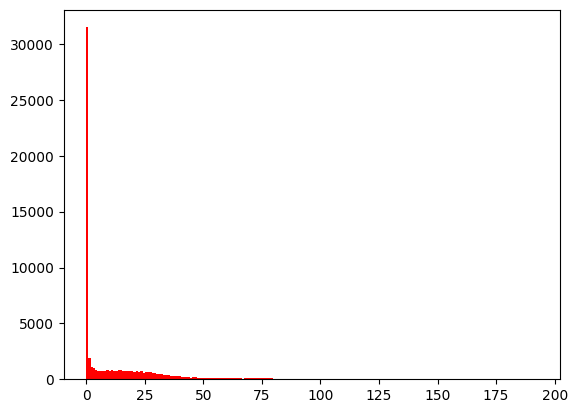

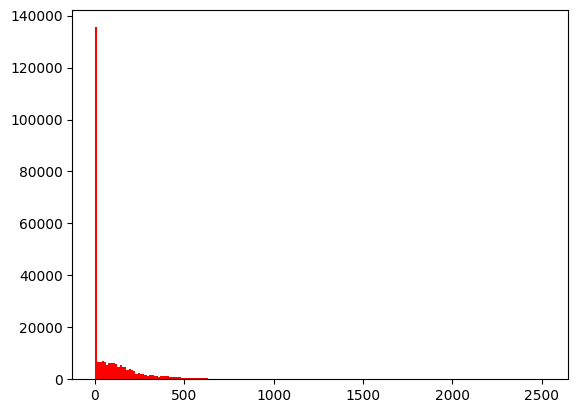

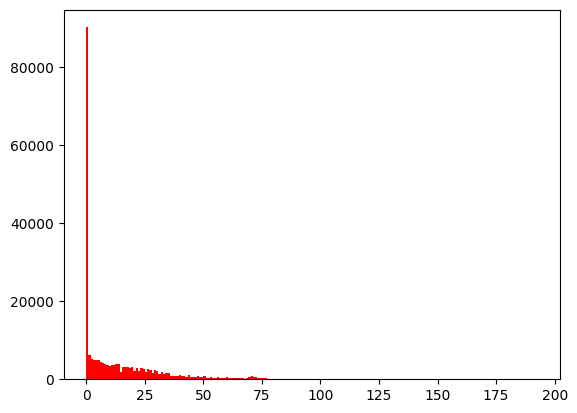

In [40]:
from utils import drawhistogram
drawhistogram(reference_)
drawhistogram(source[index])
drawhistogram(after[index])